In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

base_path  = './data/'

categories = {
    0: 'battery', 1: 'clothes', 2: 'glass', 3: 'metal', 
    4: 'organic', 5: 'paper', 6: 'plastic', 7: 'shoes'
}

In [2]:
data = pd.read_csv('./data/waste_classification.csv')
print('Number of elements =', len(data))
data.head()

Number of elements = 23871


,filename,category,category_name
0,clothes/clothes4968.jpg,1,clothes
1,organic/organic_011260_photo.jpg,4,organic
2,plastic/R_597.jpg,6,plastic
3,clothes/clothes4851.jpg,1,clothes
4,organic/organic_001994_photo.jpg,4,organic


In [3]:
df=data

In [11]:
# Dataset loading and preprocessing
def parse_image(filename, label):
    img = tf.io.read_file(base_path+filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, max_delta=0.2)
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
    img = tf.image.per_image_standardization(img)
    return img, label

In [12]:
train_data, val_data = train_test_split(data, test_size=0.2, stratify=data['category'], random_state=42)
# validate_data, test_data = train_test_split(val_data, test_size=0.5, random_state=42)

In [13]:
train_data = train_data.reset_index(drop=True)
validate_data = val_data.reset_index(drop=True)
# test_data = test_data.reset_index(drop=True)

In [14]:
# Create datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_data['filename'].values, train_data['category'].values))
val_ds = tf.data.Dataset.from_tensor_slices((val_data['filename'].values, val_data['category'].values))
# test_ds = tf.data.Dataset.from_tensor_slices((test_data['filename'].values, val_data['category'].values))

train_ds = train_ds.map(parse_image).batch(32)
val_ds = val_ds.map(parse_image).batch(32)
# test_ds = test_ds.map(parse_image).batch(32)


clothes/clothes973.jpg


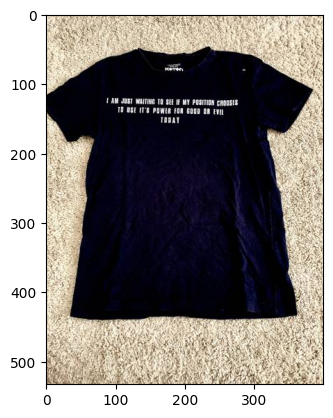

In [15]:
import random
from PIL import Image
from keras.preprocessing import image
random_row = random.randint(0, len(df)-1)
sample = df.iloc[random_row]
randomimage = image.load_img(base_path +sample['filename'])
print(sample['filename'])
plt.imshow(randomimage)

In [16]:
# Define SimpleCNN model
def build_simplecnn(num_classes):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [17]:
# Training SimpleCNN
simplecnn = build_simplecnn(num_classes=len(categories))
simplecnn.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
history = simplecnn.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=1
)

597/597 [==============================] - 1175s 2s/step - loss: 1.5159 - accuracy: 0.4783 - val_loss: 1.3522 - val_accuracy: 0.5445


In [22]:
# Save the model and metrics
simplecnn.save('./models/cnn_model_batch_1.h5')

C:\Users\theekshanas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
metrics = {'loss': history.history['loss'],
           'val_loss': history.history['val_loss'],
           'accuracy': history.history['accuracy'],
           'val_accuracy': history.history['val_accuracy']}
np.save('cnn_metrics_batch_1.npy', metrics)

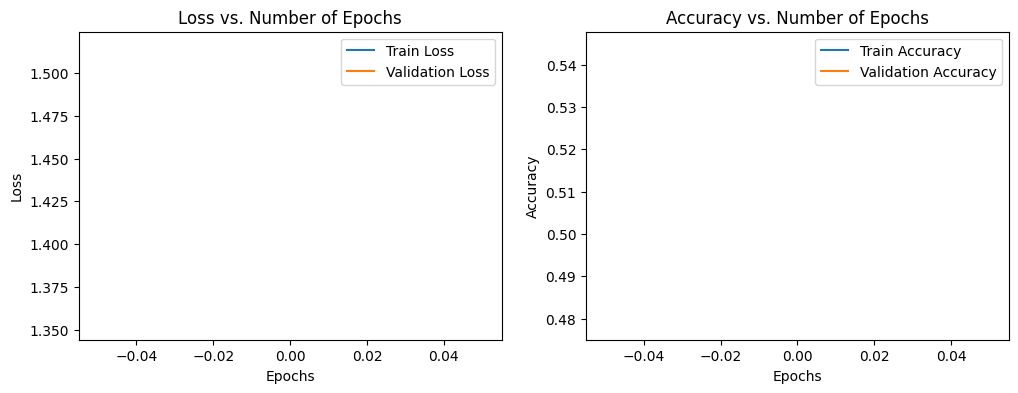

In [24]:
# Visualize the metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(metrics['loss'], label='Train Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
# plt.show()

plt.subplot(1, 2, 2)
plt.plot(metrics['accuracy'], label='Train Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs')

plt.savefig('./output/cnn_model_batch_1 Loss and Accuracy.png')
plt.show()

In [25]:
history2 = simplecnn.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=9
)

Epoch 1/9
597/597 [==============================] - 1157s 2s/step - loss: 1.3030 - accuracy: 0.5555 - val_loss: 1.2090 - val_accuracy: 0.5902
Epoch 2/9
597/597 [==============================] - 1158s 2s/step - loss: 1.1650 - accuracy: 0.6110 - val_loss: 1.1337 - val_accuracy: 0.6243
Epoch 3/9
597/597 [==============================] - 1159s 2s/step - loss: 1.0502 - accuracy: 0.6518 - val_loss: 1.1095 - val_accuracy: 0.6452
Epoch 4/9
597/597 [==============================] - 1167s 2s/step - loss: 0.9096 - accuracy: 0.7027 - val_loss: 1.0607 - val_accuracy: 0.6689
Epoch 5/9
597/597 [==============================] - 1166s 2s/step - loss: 0.7855 - accuracy: 0.7430 - val_loss: 1.0819 - val_accuracy: 0.6641
Epoch 6/9
597/597 [==============================] - 1167s 2s/step - loss: 0.6780 - accuracy: 0.7804 - val_loss: 1.0948 - val_accuracy: 0.6792
Epoch 7/9
597/597 [==============================] - 1163s 2s/step - loss: 0.5738 - accuracy: 0.8170 - val_loss: 1.1219 - val_accuracy: 0.6794

In [26]:
# Save the model and metrics
simplecnn.save('./models/cnn_model_batch_10.h5')

In [27]:
metrics2 = {'loss': history2.history['loss'],
           'val_loss': history2.history['val_loss'],
           'accuracy': history2.history['accuracy'],
           'val_accuracy': history2.history['val_accuracy']}
np.save('cnn_metrics_batch_10.npy', metrics2)

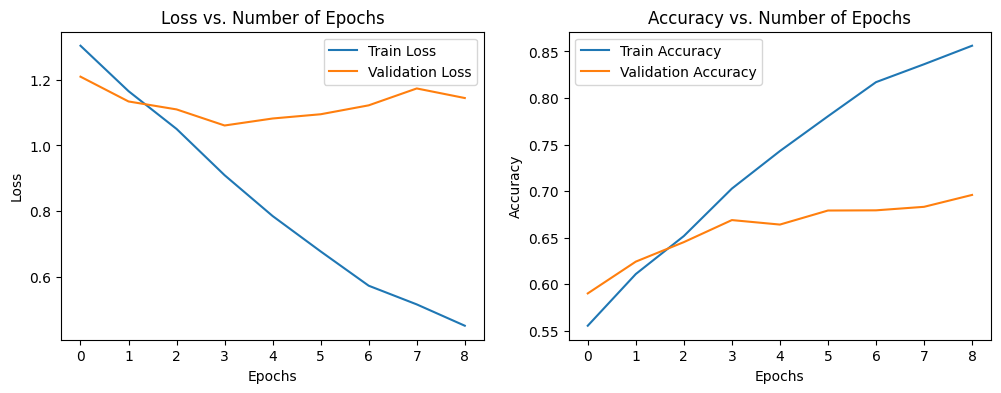

In [28]:
# Visualize the metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(metrics2['loss'], label='Train Loss')
plt.plot(metrics2['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
# plt.show()

plt.subplot(1, 2, 2)
plt.plot(metrics2['accuracy'], label='Train Accuracy')
plt.plot(metrics2['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs')

plt.savefig('./output/cnn_model_batch_10 Loss and Accuracy.png')
plt.show()

In [29]:
history3 = simplecnn.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10
)

Epoch 1/10
597/597 [==============================] - 1183s 2s/step - loss: 0.4090 - accuracy: 0.8740 - val_loss: 1.2178 - val_accuracy: 0.6859
Epoch 2/10
597/597 [==============================] - 1181s 2s/step - loss: 0.3489 - accuracy: 0.8913 - val_loss: 1.4349 - val_accuracy: 0.6861
Epoch 3/10
597/597 [==============================] - 1181s 2s/step - loss: 0.3213 - accuracy: 0.9014 - val_loss: 1.3887 - val_accuracy: 0.6999
Epoch 4/10
597/597 [==============================] - 1178s 2s/step - loss: 0.2966 - accuracy: 0.9084 - val_loss: 1.3337 - val_accuracy: 0.6955
Epoch 5/10
597/597 [==============================] - 1178s 2s/step - loss: 0.2570 - accuracy: 0.9220 - val_loss: 1.5634 - val_accuracy: 0.6917
Epoch 6/10
597/597 [==============================] - 1177s 2s/step - loss: 0.2495 - accuracy: 0.9245 - val_loss: 1.6701 - val_accuracy: 0.6898
Epoch 7/10
597/597 [==============================] - 1178s 2s/step - loss: 0.2170 - accuracy: 0.9346 - val_loss: 1.8421 - val_accuracy:

In [30]:
# Save the model and metrics
simplecnn.save('./models/cnn_model_batch_20.h5')

In [31]:
metrics3 = {'loss': history3.history['loss'],
           'val_loss': history3.history['val_loss'],
           'accuracy': history3.history['accuracy'],
           'val_accuracy': history3.history['val_accuracy']}
np.save('cnn_metrics_batch_20.npy', metrics3)

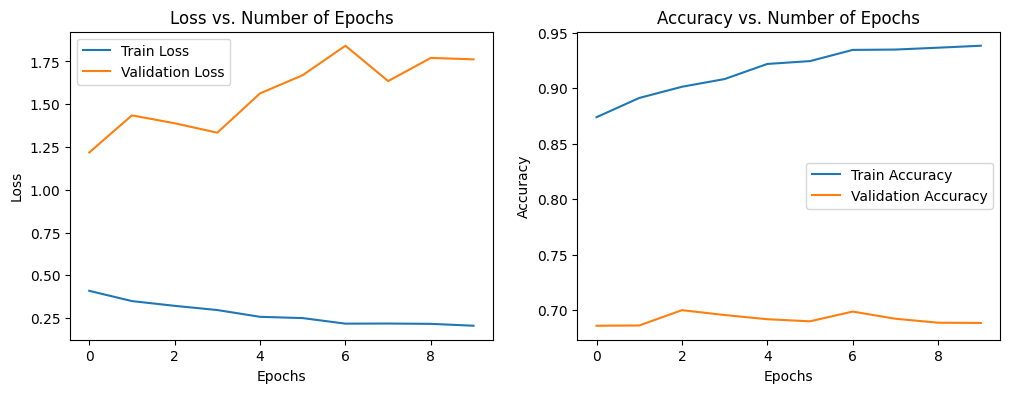

In [32]:
# Visualize the metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(metrics3['loss'], label='Train Loss')
plt.plot(metrics3['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
# plt.show()

plt.subplot(1, 2, 2)
plt.plot(metrics3['accuracy'], label='Train Accuracy')
plt.plot(metrics3['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs')

plt.savefig('./output/cnn_model_batch_20 Loss and Accuracy.png')
plt.show()